# Домашняя работа (Линейная классификация)

Дано:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [4]:
X = X.T
X

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [5]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [6]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

## 1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.  

В нашей задаче целевая переменная принимает значение от 0 до 1. Построим графики $f(x)=ln(x)$ в этом диапазоне

<ipython-input-7-779c90293506>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, np.log(x))


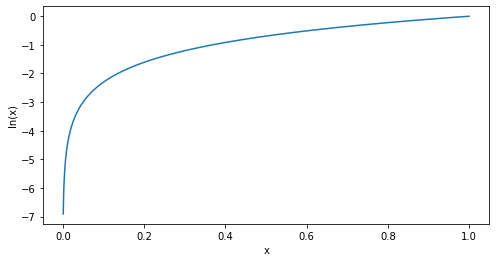

In [7]:
x = np.linspace(0, 1, 1000)

plt.figure(figsize=(8, 4))
plt.plot(x, np.log(x))
plt.xlabel('x')
plt.ylabel('ln(x)')
plt.show()

Видно, что логарифм натуральный в нуле стремится к бесконечности. Тогда для решения проблемы аппроксимации логарифма в нуле можно установить жесткую отрицательную константу, например -23, это значение соответствует $ln(10^{-10})$ что очень близко к 0. Для случая когда предсказание равно 1 и это правильный ответ, отнимем от 1 значение сдвига $10^{-10}$ Тогда можно переписать алгоритм расчета logloss

In [8]:
def calc_logloss_impr(y, y_pred):
    y_pred = np.array(y_pred, dtype=float)
    error = - (np.dot(y, np.nan_to_num(np.log(y_pred), neginf=-1e5)) + np.dot((1.0 - y), np.nan_to_num(np.log(1.0 - y_pred), neginf=-1e5)))
    return error


Проверим работу данного алгоритма

In [9]:
y_pred = np.array([1, 0, 0])
y_test = np.array([1, 1, 1])

print('Ошибка старого метода:', calc_logloss(y_test, y_pred))
print('Ошибка нового метода:', calc_logloss_impr(y_test, y_pred))

Ошибка старого метода: nan
Ошибка нового метода: 200000.0


<ipython-input-5-7d5907c1794a>:2: RuntimeWarning: divide by zero encountered in log
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
<ipython-input-5-7d5907c1794a>:2: RuntimeWarning: invalid value encountered in multiply
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
<ipython-input-8-6eea932e2396>:3: RuntimeWarning: divide by zero encountered in log
  error = - (np.dot(y, np.nan_to_num(np.log(y_pred), neginf=-1e5)) + np.dot((1.0 - y), np.nan_to_num(np.log(1.0 - y_pred), neginf=-1e5)))


## 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

**Дано:**

In [10]:
def eval_model(X, y, iterations, alpha=1e-4, metric: callable = None):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    
    if i % (iterations / 10) == 0:
        print(i, W, err)
        
    return W

In [11]:
eval_model(X.T, y, iterations=5000, alpha=1e-5)


5000 [ 0.49314177 -0.14151841 -0.00414786  1.52547952] 0.8471318040263481


<ipython-input-5-7d5907c1794a>:2: RuntimeWarning: divide by zero encountered in log
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
<ipython-input-5-7d5907c1794a>:2: RuntimeWarning: invalid value encountered in multiply
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))


array([ 0.49314177, -0.14151841, -0.00414786,  1.52547952])

**Решение**. Для начала перепишем данную функцию используя критерий сходимости сходимости: 

$$||w^{k}-w^{k-1}|| < \varepsilon.$$

$$w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X).$$

In [12]:
def eval_model_impr(X, y, 
                    iterations=5000, 
#                     alpha=1e-4, 
                    random_seed=17,
                    epsilon=1e-5, 
                    metric=calc_logloss_impr, 
                    visualization=False, 
                    speed_divider=5, 
                    eta=0.1):
       
    np.random.seed(random_seed)
    W_new = np.random.randn(X.shape[1])
    n = X.shape[0]
    err_list = list()
    for i in range(1, iterations+1):
        W_old = W_new
        z = np.dot(X, W_old)
        y_pred = sigmoid(z)
        W_new = W_old - eta * (1 / n * np.dot((y_pred - y), X))
        err_list.append(metric(y, y_pred))
        
        if i > 2:
            if np.linalg.norm(W_new - W_old) < epsilon:
                break
        
    min_error = metric(y, sigmoid(np.dot(X, W_new)))
    if visualization:
        steps = np.linspace(1, len(err_list)+1, len(err_list))
        plt.figure(figsize=(8,6))
        plt.scatter(steps, err_list, c='green')
        plt.plot(steps, err_list, c='orange')
        plt.xlabel('Steps')
        plt.ylabel('Error')
        plt.title(f'Min error is {min_error}')
        plt.show()
            
    return W_new, min_error

<ipython-input-8-6eea932e2396>:3: RuntimeWarning: divide by zero encountered in log
  error = - (np.dot(y, np.nan_to_num(np.log(y_pred), neginf=-1e5)) + np.dot((1.0 - y), np.nan_to_num(np.log(1.0 - y_pred), neginf=-1e5)))


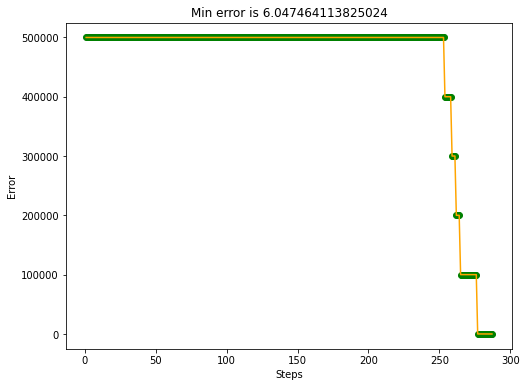

In [13]:
w, error = eval_model_impr(X, y, 
#                            alpha=1e-5, 
                           random_seed=42, epsilon=1e-5,  metric=calc_logloss_impr, visualization=True, 
                           eta=0.000005, 
                           speed_divider=10, iterations=5000)

В нашей реализации есть несколько гиперпараметров которые могут влиять на величину ошибки logloss. Самый очевидный это epsilon - он напрямую задает критерий сходимости, чем меньше величина epsilon, тем меньше будет ошибка. Второй - это скорость обучения alpha. Чем меньше скорость обучения, тем ниже вероятность того, что мы перепрыгнем точку минимума. Однако уменьшение скорости обучения может вызвать необходимость в увеличении количества итераций (iterations). Для нахождения оптимального значения параметра alpha, построим график зависимости ошибки от скорости обучения

<ipython-input-8-6eea932e2396>:3: RuntimeWarning: divide by zero encountered in log
  error = - (np.dot(y, np.nan_to_num(np.log(y_pred), neginf=-1e5)) + np.dot((1.0 - y), np.nan_to_num(np.log(1.0 - y_pred), neginf=-1e5)))


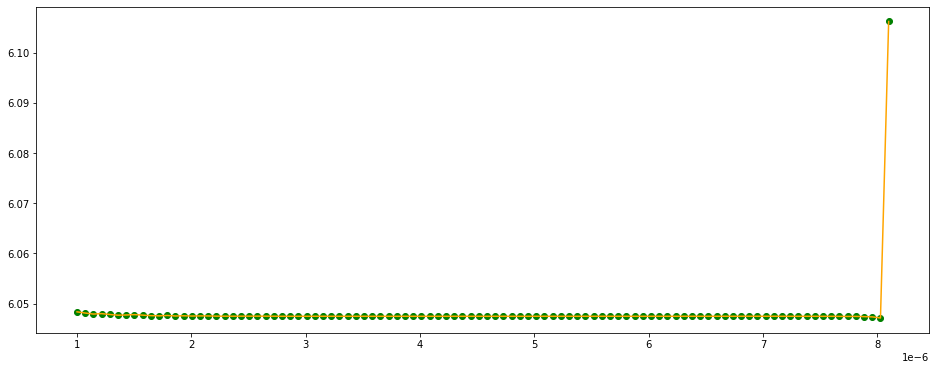

In [14]:
def get_optimal_params(model, arg_model, kwarg_model, params, upper_steps=1e-4, lower_steps=1e-8):
    steps = np.linspace(upper_steps, lower_steps, 100)
    errors = [model.__call__(*arg_model, **kwarg_model, **{params: i})[1] for i in steps]
    
    plt.figure(figsize=(16, 6))
    plt.scatter(steps, errors, c='green')
    plt.plot(steps, errors, c='orange')
    plt.show()

get_optimal_params(model=eval_model_impr,
                  arg_model=(X, y),
                  kwarg_model={'random_seed': 42, 
                               'metric': calc_logloss_impr},
                  params='eta',
                  upper_steps=0.81e-5,
                  lower_steps=1e-6) 


Из графика видно, что начиная со значения $\alpha=0.8\cdot10^{-5}$ значения ошибки выходит на плато. Построим получившуюся модель

<ipython-input-8-6eea932e2396>:3: RuntimeWarning: divide by zero encountered in log
  error = - (np.dot(y, np.nan_to_num(np.log(y_pred), neginf=-1e5)) + np.dot((1.0 - y), np.nan_to_num(np.log(1.0 - y_pred), neginf=-1e5)))


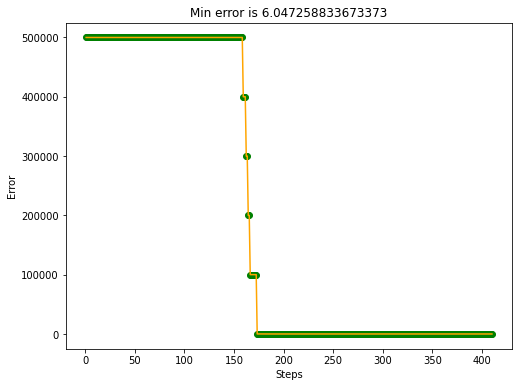

In [15]:
w, error = eval_model_impr(X, y, eta=0.8e-5, random_seed=42, metric=calc_logloss_impr, visualization=True)

## 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [16]:
def calc_pred_proba(w, x):
    return sigmoid(np.dot(x, w))

calc_pred_proba(w, np.array([[1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
                             [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00]]))

y_pred_proba = calc_pred_proba(w, X)
y_pred_proba, y

(array([0.65930855, 0.5431678 , 0.80744036, 0.60268333, 0.39857199,
        0.5173768 , 0.67016982, 0.2299182 , 0.68610937, 0.69520619]),
 array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]))

## 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

Реализуем функцию calc_pred с отказом в принятии решения в пороговом значении 

In [17]:
def calc_pred(w, x, threshold=0.5):
    if np.ndim(x) == 1: 
        return 1 if sigmoid(np.dot(x, w)) > threshold else 0
    
    y_pred = calc_pred_proba(w, x)
    y_pred[y_pred > threshold] = 1
    y_pred[y_pred < threshold] = 0
    y_pred[y_pred == threshold] = np.NAN
    return y_pred

print(calc_pred(w, np.array([1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00])))
print(calc_pred(w, np.array([[1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
                             [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00]])))

y_pred = calc_pred(w, X)
y_pred, y

0
[0. 1.]


(array([1., 1., 1., 1., 0., 1., 1., 0., 1., 1.]),
 array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]))

## 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

Начнем accuracy:

$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}].$$

In [18]:
def calc_accuracy(y:np.array, y_pred:np.array) -> float:
    return y[y == y_pred].shape[0] / y.shape[0]

calc_accuracy(y, y_pred)

0.5

Матрица ошибок: 

In [19]:
import pandas as pd

def __calc_true_wrong_answer(y, y_pred):
    true_answer = y_pred[y == y_pred]
    wrong_answer = y_pred[y != y_pred]
    TP = true_answer[true_answer == 1].shape[0]
    TN = true_answer[true_answer == 0].shape[0]
    FP = wrong_answer[wrong_answer == 1].shape[0]
    FN = wrong_answer[wrong_answer == 0].shape[0]
    return np.array((TP, FP, FN, TN)).reshape((2, 2))

def calc_confusion_matrix(y:np.array, y_pred:np.array):
    return pd.DataFrame(data=__calc_true_wrong_answer(y, y_pred), index=['a(x)=1', 'a(x)=0'], columns=['y=+1', 'y=0'])

calc_confusion_matrix(y, y_pred)

,y=+1,y=0
a(x)=1,4,4
a(x)=0,1,1


In [20]:
y, y_pred

(array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]),
 array([1., 1., 1., 1., 0., 1., 1., 0., 1., 1.]))

Точность: 
$$precision(a, X) = \frac{TP}{TP+FP}.$$

In [21]:
def calc_precision(y, y_pred):
    confusion_matrix_ = __calc_true_wrong_answer(y, y_pred)
    return confusion_matrix_[0][0] / (confusion_matrix_[0][0] + confusion_matrix_[0][1])

calc_precision(y, y_pred)
    

0.5

Полнота: 
$$recall(a, X) = \frac{TP}{TP+FN},$$

In [22]:
def calc_recall(y, y_pred):
    confusion_matrix_ = __calc_true_wrong_answer(y, y_pred)
    return confusion_matrix_[0][0] / (confusion_matrix_[0][0] + confusion_matrix_[1][0])

calc_recall(y, y_pred)

0.8

F1-мера: 
$$F = \frac{2 \cdot precision \cdot recall }{ presision + recall}.$$

In [23]:
def calc_f1_score(y, y_pred):
    return 2 * calc_precision(y, y_pred) * calc_recall(y, y_pred) / (calc_precision(y, y_pred) + calc_recall(y, y_pred)) 


calc_f1_score(y, y_pred)

0.6153846153846154

## 6. Могла ли модель переобучиться? Почему?

In [24]:
w

array([ 0.49585582, -0.13998916, -0.00243556,  1.5221283 ])

Судя по метрике и величине весов, переобучения нет. Но модель склонная к переобучению т.к. граница принятия решения соответствует $a(x)=0.5$, что кажется разумным. Распишем данное условие по определению:

$$a(x)=\sigma(\vec{w}^TX)=\frac{1}{1+e^{-\vec{w}^TX}}=0.5$$

Такое возможно, если

$$e^{-\vec{w}^TX}=1$$

$$-\vec{w}^TX=0$$

Таким образом скалярное произведение равно 0. Из этого следует, что вектора перпендикулярны, а значит нет ограничений на норму вектора (длину) и, следовательно, вектор может принимать любые значения, в том числе и бесконечно большие

## 7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

Обновим функцию calc_loglos_impr для возможности работать с регуляризацие. Функция loglos с регуляризацие Ridge имеет вид:

$$-\text{ln}L(X) = -\sum^{l}_{i=1}([y_{i} = +1] \text{ln}\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)}) + [y_{i} = -1]\text{ln}(1 - \frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)}) + \lambda||w||^2$$

loglos с регуляризацие Lasso имеет вид:

$$-\text{ln}L(X) = -\sum^{l}_{i=1}([y_{i} = +1] \text{ln}\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)}) + [y_{i} = -1]\text{ln}(1 - \frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)}) + \lambda||w||$$

In [25]:
def calc_logloss_impr(y, y_pred, lambda_, weights, regularization=None):
    """
    regularization: отвечает за регуляризацию. Может принимать значения None, Ridge, Lasso
    """
    y_pred = np.array(y_pred, dtype=float)
    error = - (np.dot(y, np.nan_to_num(np.log(y_pred), neginf=-1e5)) + np.dot((1.0 - y), np.nan_to_num(np.log(1.0 - y_pred), neginf=-1e5)))
    
    if regularization == 'Ridge':
        error += lambda_ * np.linalg.norm(weights, ord=2)
    
    if regularization == 'Lasso':
        error += lambda_ * np.sum(np.abs(weights))
    
    return error


Создадим одну функцию с возможность выбора способа регуляризации. Для это нужно переписть градиентный спуск ввиде: 

$$\vec{w_{new}} = \vec{w_{old}} - \eta( \sum_{n=1}^N (y_n - \vec{w}^TX)X + 2\lambda \vec{w_{old}}).$$

Для регуляризации типа Ridge и 

$$\vec{w_{new}} = \vec{w_{old}} - \eta( \sum_{n=1}^N (y_n - \vec{w}^TX)X + \lambda).$$

In [26]:
def eval_model_impr(X, y, 
                    iterations=5000, 
#                     alpha=1e-4, 
                    random_seed=17,
                    epsilon=1e-5, 
                    metric=calc_logloss_impr, 
                    visualization=False, 
                    speed_divider=5, 
                    eta=0.1, 
                    regularization = None, 
                    lambda_=0):
    """
    regularization: отвечает за регуляризацию. Может принимать значения None, Ridge, Lasso
    """
    
    np.random.seed(random_seed)
    W_new = np.random.randn(X.shape[1])
    n = X.shape[0]
    err_list = list()
    regular = 0
        
    for i in range(1, iterations+1):
        W_old = W_new
        z = np.dot(X, W_old)
        y_pred = sigmoid(z)
        
        if regularization == 'Ridge':
            W_new = W_old - eta * 1 / n * (np.dot((y_pred - y), X) + 2 * lambda_ * W_old)
        if regularization == 'Lasso':
            W_new = W_old - eta * 1 / n * (np.dot((y_pred - y), X) + lambda_ )
        if not regularization:
            W_new = W_old - eta * (1 / n * np.dot((y_pred - y), X))
            
        err_list.append(metric(y, y_pred, lambda_, W_new, regularization))
        
        if i > 2:
            if np.linalg.norm(W_new - W_old) < epsilon:
                break
                
    min_error = metric(y, sigmoid(np.dot(X, W_new)), lambda_, W_new, regularization)
    if visualization:
        steps = np.linspace(1, len(err_list)+1, len(err_list))
        plt.figure(figsize=(8,6))
        plt.scatter(steps, err_list, c='green')
        plt.plot(steps, err_list, c='orange')
        plt.xlabel('Steps')
        plt.ylabel('Error')
        plt.title(f'Min error is {min_error}')
        plt.show()
            
    return W_new, err_list

<ipython-input-25-ac1802ac554d>:6: RuntimeWarning: divide by zero encountered in log
  error = - (np.dot(y, np.nan_to_num(np.log(y_pred), neginf=-1e5)) + np.dot((1.0 - y), np.nan_to_num(np.log(1.0 - y_pred), neginf=-1e5)))


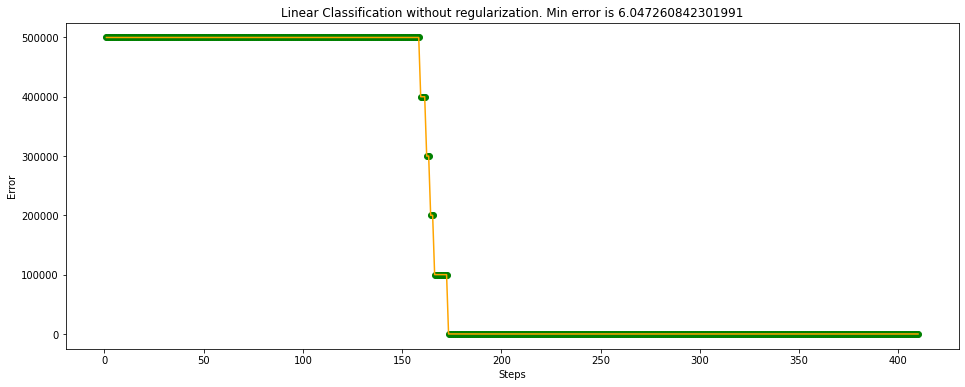

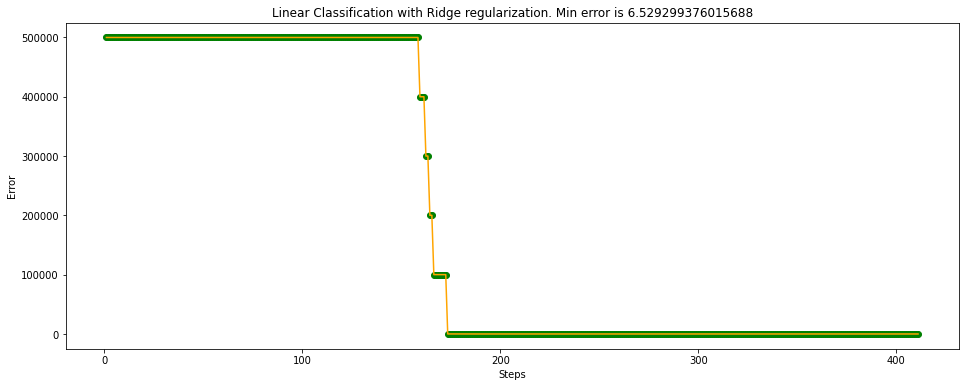

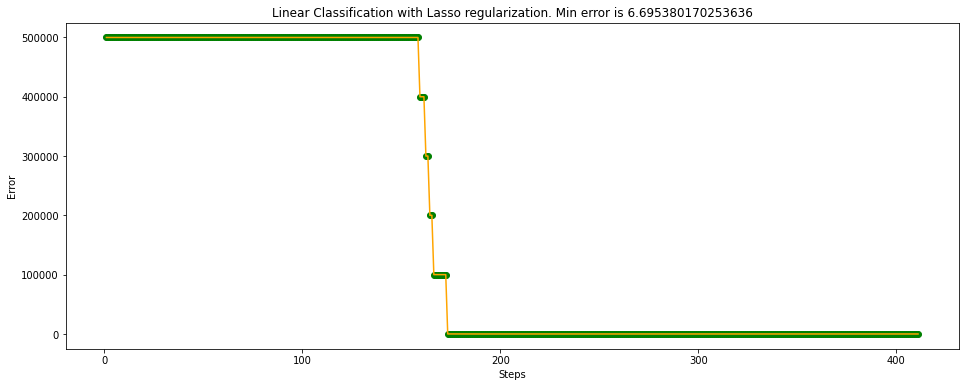

In [27]:
def make_fig(value, colors=('green', 'orange'), labels=('Steps', 'Error')):
    steps = np.linspace(1, len(value) + 1, len(value))
    plt.figure(figsize=(16, 6))
    plt.scatter(steps, value, c=colors[0])
    plt.plot(steps, value, c=colors[1])
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    
w, error_list = eval_model_impr(X, y, eta=0.8e-5, random_seed=42, metric=calc_logloss_impr)
w_l2, error_list_l2 = eval_model_impr(X, y, eta=0.8e-5, random_seed=42, metric=calc_logloss_impr, regularization='Ridge', lambda_=0.3)
w_l1, error_list_l1 = eval_model_impr(X, y, eta=0.8e-5, random_seed=42, metric=calc_logloss_impr, regularization='Lasso', lambda_=0.3)

make_fig(error_list)
plt.title(f'Linear Classification without regularization. Min error is {error_list[-1]}')

make_fig(error_list_l2)
plt.title(f'Linear Classification with Ridge regularization. Min error is {error_list_l2[-1]}')

make_fig(error_list_l2)
plt.title(f'Linear Classification with Lasso regularization. Min error is {error_list_l1[-1]}')

plt.show()